In [6]:
import cv2

img = cv2.imread('images/000.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('gray000.png',img)

True

In [7]:
print(img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [8]:
print(img.shape)

(375, 435)


In [9]:
print(img.ravel().shape)

(163125,)


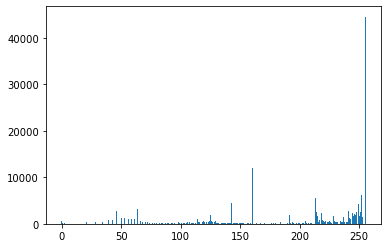

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#ヒストグラムを描画
def plt_hist(img):
    img_hist = np.histogram(img.ravel(),256,[0,256])
    hist = img_hist[0]
    plt.bar(np.arange(256), hist)
    plt.show()

plt_hist(cv2.imread('images/000.png',cv2.IMREAD_GRAYSCALE))

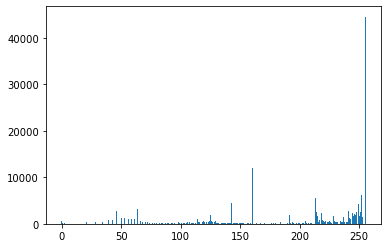

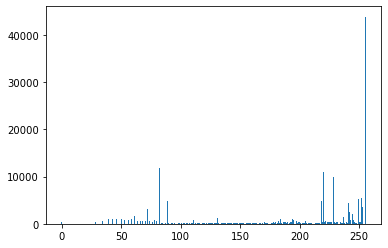

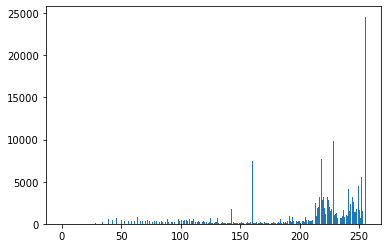

In [11]:
plt_hist(cv2.imread('images/000.png',cv2.IMREAD_GRAYSCALE))
plt_hist(cv2.imread('images/001.png',cv2.IMREAD_GRAYSCALE))
plt_hist(cv2.imread('images/002.png',cv2.IMREAD_GRAYSCALE))

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

targets_data = pd.read_csv('y_classified.csv')
print(targets_data['Kirishima'])

0     1
1     0
2     1
3     0
4     1
     ..
95    1
96    0
97    1
98    1
99    1
Name: Kirishima, Length: 100, dtype: int64


In [13]:
images = []
for i in range(100):
    file = ('images/%03d.png' %(i))
    img  = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    images.append(img)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [14]:
images_data = np.empty((100, len(images[0].ravel())), int)
for i in range(100):
    images_data[i] = np.array([images[i].ravel()])

In [15]:
print(images_data.shape)

(100, 163125)


In [16]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(images_data, targets_data['Kirishima'],random_state = 0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 163125)
(25, 163125)
(75,)
(25,)


In [24]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
print(knn.predict(np.array([X_test[0]])))

print(y_test)

[1]
26    0
86    1
2     1
55    0
75    1
93    0
16    1
73    1
54    1
95    1
53    0
92    1
78    0
13    0
7     1
30    0
22    1
24    1
33    0
8     1
43    1
62    1
3     0
71    1
45    0
Name: Kirishima, dtype: int64


In [28]:
print(knn.predict(np.array([X_test[0],X_test[1],X_test[2],X_test[3]])))
print(y_test)

[1 1 1 0]
26    0
86    1
2     1
55    0
75    1
93    0
16    1
73    1
54    1
95    1
53    0
92    1
78    0
13    0
7     1
30    0
22    1
24    1
33    0
8     1
43    1
62    1
3     0
71    1
45    0
Name: Kirishima, dtype: int64


In [30]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0]


In [31]:
print(np.mean(y_pred == y_test))

0.6
